In [38]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
#loading the dataset
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#calculating the mean of years of experience
mean_YE = sum(data['YearsExperience']) / float(len(data['YearsExperience']))
mean_YE

5.3133333333333335

In [5]:
#calculating the mean of salary
mean_Sal = sum(data['Salary']) / float(len(data['Salary']))
mean_Sal

76003.0

In [46]:
#Function for calculating variance
def calc_variance(arr, mean):
    return sum([(i-mean)**2 for i in arr])

In [7]:
#Function for calculating covariance between years of experience and salary
def calc_covariance(YearsExperience, mean_YE, Salary , mean_Sal):
    covariance = 0.0
    for i in range(len(YearsExperience)):
        covariance = covariance + (YearsExperience[i] - mean_YE) * (Salary[i] - mean_Sal)
    return covariance

In [8]:
#Calculating the variance in years of experience
variance_YE = calc_variance(data['YearsExperience'],mean_YE)
variance_YE

233.55466666666663

In [9]:
#Calculating the variance in salary
variance_Sal = calc_variance(data['Salary'],mean_Sal)
variance_Sal

21794977852.0

In [10]:
#Calculating the covariance between years of experience and salary
covariance_YE_Sal = calc_covariance(data["YearsExperience"],mean_YE,data["Salary"],mean_Sal)
covariance_YE_Sal

2207082.8

In [11]:
#Calculating slope of fitted line
m = covariance_YE_Sal/ variance_YE
m

9449.962321455077

In [12]:
#Calculating intercept of fitted line
c = mean_Sal - m * mean_YE
c

25792.20019866869

In [34]:
#Example : Using the model to find the salary of a person with 5 years of experience
sal = m*5 + c
sal

73042.01180594409

In [35]:
print("The salary of person with 5 years of experience is ", sal)

The salary of person with 5 years of experience is  73042.01180594409


In [31]:
X=np.array(data["YearsExperience"])
predicted_Sal=np.array([m*x+c for x in X])

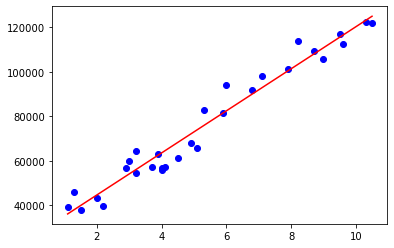

In [33]:
plt.scatter(x=data["YearsExperience"], y=data["Salary"],color='blue')
plt.plot(data["YearsExperience"],predicted_Sal,color='red')

In [51]:
#Function to calculate rsquare to check accuracy of model
def calc_rsquare(y,y_pred,SST,mean_Sal):
    SSR=calc_variance(y_pred,mean_Sal)
    rsq=SSR/SST
    return rsq

In [53]:
#Printing accuracy of model using rsquare value
print(calc_rsquare(np.array(data["Salary"]),predicted_Sal,variance_Sal,mean_Sal))

0.9569566641435084
